In [1]:
!pip install -q networkx
!git clone -q https://github.com/DanilDmitriev1999/mipt_vis_hw

In [2]:
%matplotlib inline

import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

In [11]:
class LayeredTree:
    def __init__(self, filename):
      self.filename = filename
      self.coordinates = {}
      self.tree = nx.read_graphml(self.filename)
      self.max_level = len(list(nx.dag_longest_path(self.tree)))

    def calculate_x_coordinates(self, node, previous_node):
        offset = 0
        maxx = 0
        sum = 0
        count = 0

        if len(list(nx.neighbors(self.tree, node))) == 0:
            self.tree.nodes[node]['corr_x'] = 0
            return

        for current_node in list(nx.neighbors(self.tree, node)):
            if current_node != previous_node:
                self.calculate_x_coordinates(current_node, node)

        for current_node in nx.neighbors(self.tree, node):
            if current_node != previous_node:
                maxx = self.move_tree(current_node, node, offset, maxx)
                offset = maxx + offset + 2
                count += 1
                sum += self.tree.nodes[current_node]['corr_x']
        self.tree.nodes[node]['corr_x'] = int(sum/count)
        #x = 0

    def calculate_y_coordinates(self, node, previous_node, level):
        if len(list(nx.neighbors(self.tree, node))) == 0:
            self.tree.nodes[node]['corr_y'] = level
            return
        for current_node in list(nx.neighbors(self.tree, node)):
            if current_node != previous_node:
                self.calculate_y_coordinates(current_node, node, level - 1)

        self.tree.nodes[node]['corr_y'] = level

    def move_tree(self, node, previous_node, offset, maxx):
        self.tree.nodes[node]['corr_x'] += offset
        maxx = max(self.tree.nodes[node]['corr_x'], maxx)
        if len(list(nx.neighbors(self.tree, node))) == 0:
            return maxx
        for current_node in list(nx.neighbors(self.tree, node)):
            if current_node != previous_node:
                maxx = max(maxx, self.move_tree(current_node, node, offset, maxx))
        return maxx


    def draw(self):
        self.calculate_x_coordinates('n0', 'n0')
        self.calculate_y_coordinates('n0', 'n0', self.max_level)

        for node in list(self.tree.nodes):
            self.coordinates[node] = (self.tree.nodes[node]['corr_x'], self.tree.nodes[node]['corr_y'])

        plt.figure(figsize=(20,10))

        nx.draw(self.tree, pos=self.coordinates, with_labels=True)
        plt.show()

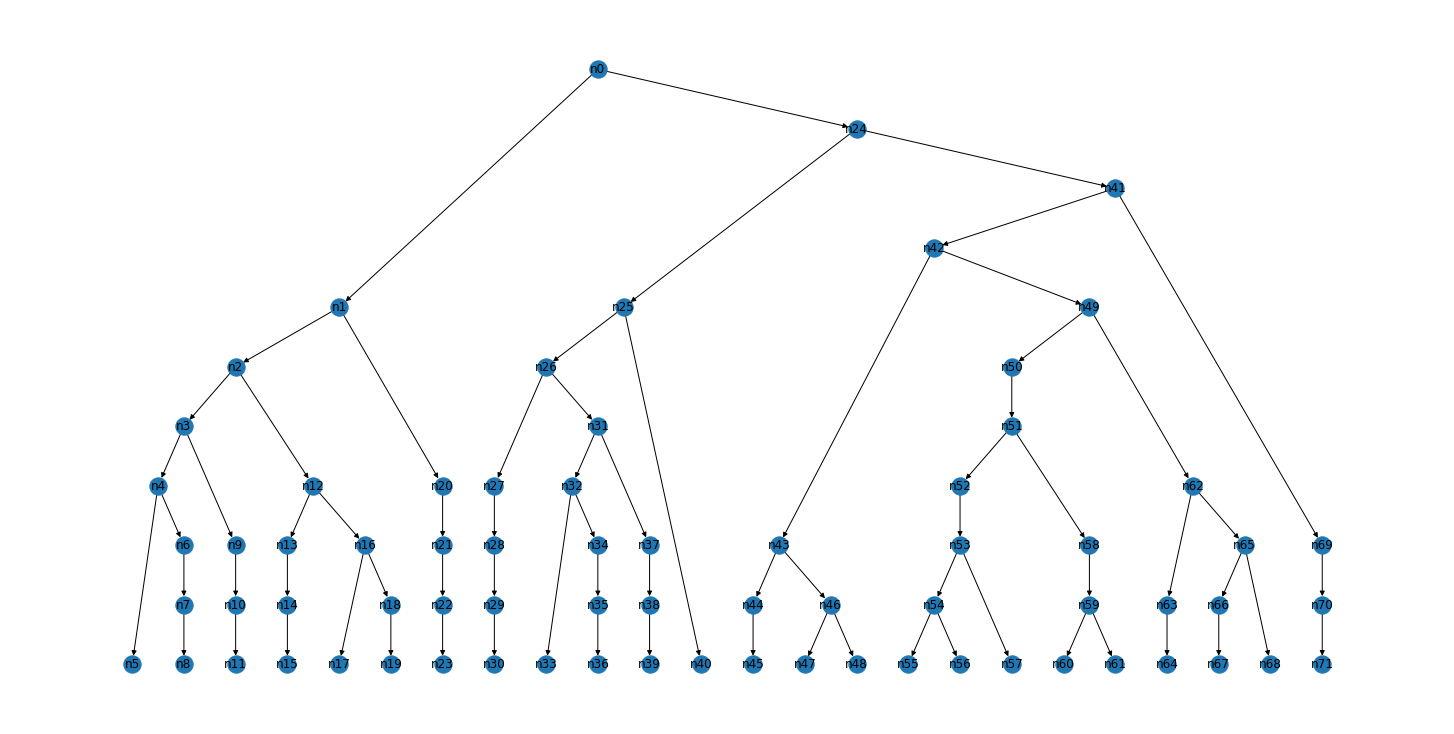

In [15]:
tree = LayeredTree('/content/mipt_vis_hw/dt/tree-72n.xml')
tree.draw()